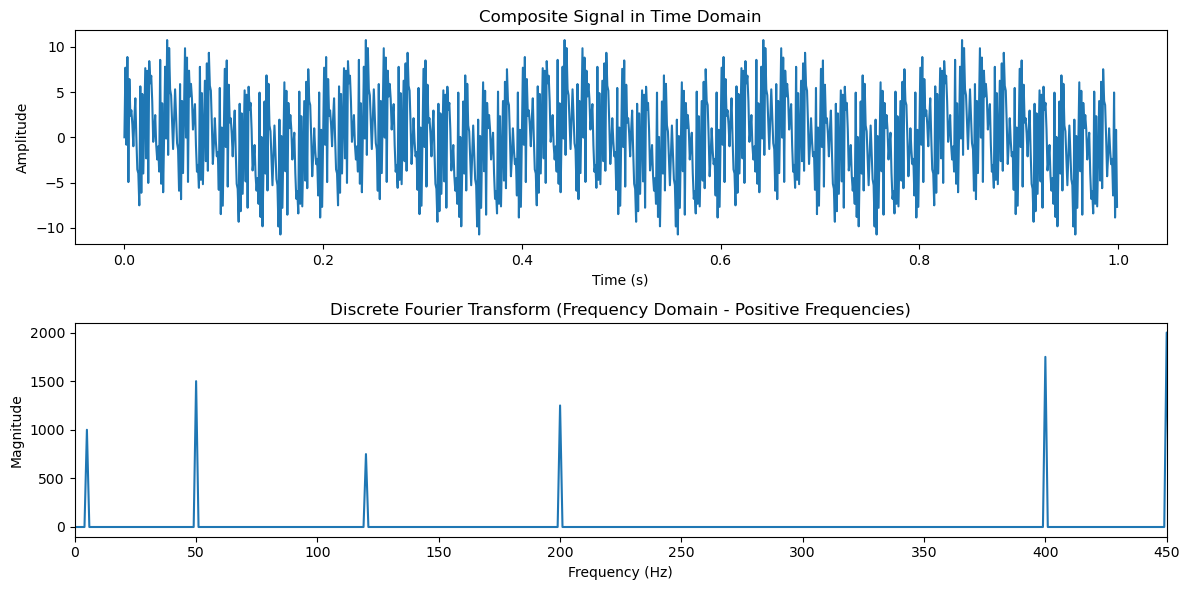

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define sampling parameters
sampling_rate = 1000  # Hz
duration = 1  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define multiple frequencies and corresponding higher amplitudes
frequencies = [5, 50, 120, 200, 400, 450]  # Frequencies of sine waves (Hz), with the last frequency now at 450 Hz
amplitudes = [2.0, 3.0, 1.5, 2.5, 3.5, 4.0]  # Corresponding amplitudes

# Generate the composite signal by summing sine waves with the given frequencies and amplitudes
signal = sum(amplitude * np.sin(2 * np.pi * frequency * t) for amplitude, frequency in zip(amplitudes, frequencies))

# Perform DFT manually
N = len(signal)
dft_result = []
for k in range(N):
    real_part = sum(signal[n] * np.cos(2 * np.pi * k * n / N) for n in range(N))
    imag_part = -sum(signal[n] * np.sin(2 * np.pi * k * n / N) for n in range(N))
    dft_result.append(complex(real_part, imag_part))

# Convert list to numpy array for easier manipulation
dft_result = np.array(dft_result)

# Frequency axis for plotting, using only the positive frequencies
frequencies_axis = np.fft.fftfreq(N, 1 / sampling_rate)
positive_frequencies = frequencies_axis[:N // 2]
positive_dft_result = np.abs(dft_result)[:N // 2]

# Plot the original composite signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Composite Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the magnitude of the DFT (frequency spectrum) up to 450 Hz
plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, positive_dft_result)
plt.xlim(0, 450)  # Limit the x-axis to 0-450 Hz to include the highest frequency component
plt.title("Discrete Fourier Transform (Frequency Domain - Positive Frequencies)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()